**Architecture: Integrated CBAM into the AttentionResNet class and removed the
SE blocks and standalone spatial attention modules.

** Training and Evaluation: Kept the training loop, loss calculation, evaluation, and visualization code as is.

** Gradient Clipping: Included gradient clipping during the training loop.

** Data Augmentation: Applied AdjustBrightness and AdjustContrast transformations only to the training data.

In [1]:
!pip install torchsummary
!pip install torchviz


In [2]:
!sudo apt-get install -y graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 100 not upgraded.


In [5]:
# Define the paths
train_data_path = '/notebooks/FER2013-ValTestTrain/train'
val_data_path = '/notebooks/FER2013-ValTestTrain/val'
test_data_path = '/notebooks/FER2013-ValTestTrain/test'


In [6]:
import os

def count_files(directory):
    total_count = 0
    for dirpath, dirnames, filenames in os.walk(directory):
        total_count += len(filenames)
    return total_count

# Set the path to your FER2013 directory
base_dir = '/notebooks/FER2013-ValTestTrain'

# Count files in the base directory recursively
total_files_count = count_files(base_dir)

# Count files in the Train and Test subfolders
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


train_files_count = count_files(train_dir)
test_files_count = count_files(test_dir)
val_files_count = count_files(val_dir)


print(f'Total files in FER2013: {total_files_count}')
print(f'Total files in Train: {train_files_count}')
print(f'Total files in Test: {test_files_count}')
print(f'Total files in Val: {val_files_count}')

Total files in FER2013: 71772
Total files in Train: 28698
Total files in Test: 3591
Total files in Val: 3587


Class distribution in training set before augmentation: Counter({3: 7214, 6: 4964, 4: 4829, 2: 4097, 0: 3988, 5: 3170, 1: 436})
Class distribution in validation set before augmentation: Counter({3: 887, 4: 623, 6: 616, 2: 512, 0: 478, 5: 415, 1: 55})
Class distribution in test set before augmentation: Counter({3: 887, 4: 624, 6: 617, 2: 512, 0: 479, 5: 416, 1: 56})


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total number of parameters in the model: 25259057
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
 AdaptiveAvgPool2d-4             [-1, 64, 1, 1]               0
            Conv2d-5              [-1, 4, 1, 1]             256
              ReLU-6              [-1, 4, 1, 1]               0
            Conv2d-7             [-1, 64, 1, 1]             256
 AdaptiveMaxPool2d-8             [-1, 64, 1, 1]               0
            Conv2d-9              [-1, 4, 1, 1]             256
             ReLU-10              [-1, 4, 1, 1]               0
           Conv2d-11             [-1, 64, 1, 1]             256
          Sigmoid-12             [-1, 64, 1, 1]               0
 ChannelAttention-13             [-1, 64, 1, 1]      

/tmp/ipykernel_601/2648872128.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.class_weights = torch.tensor(class_weights, dtype=torch.float32).cuda()


Epoch [1/100], Training Loss: 1.8778, Training Accuracy: 25.59%
Validation Loss: 1.6436, Validation Accuracy: 40.94%
Warmup Scheduler Step at Epoch 1
---- Current Learning Rate soon after the scheduler step ----- : 0.0000250
Epoch [2/100], Training Loss: 1.5721, Training Accuracy: 43.85%
Validation Loss: 1.3909, Validation Accuracy: 54.77%
Warmup Scheduler Step at Epoch 2
---- Current Learning Rate soon after the scheduler step ----- : 0.0000375
Epoch [3/100], Training Loss: 1.4031, Training Accuracy: 53.22%
Validation Loss: 1.2527, Validation Accuracy: 60.62%
Warmup Scheduler Step at Epoch 3
---- Current Learning Rate soon after the scheduler step ----- : 0.0000500
Epoch [4/100], Training Loss: 1.3192, Training Accuracy: 57.71%
Validation Loss: 1.2371, Validation Accuracy: 62.30%
Warmup Scheduler Step at Epoch 4
---- Current Learning Rate soon after the scheduler step ----- : 0.0000625
Epoch [5/100], Training Loss: 1.2538, Training Accuracy: 60.91%
Validation Loss: 1.1911, Validation 

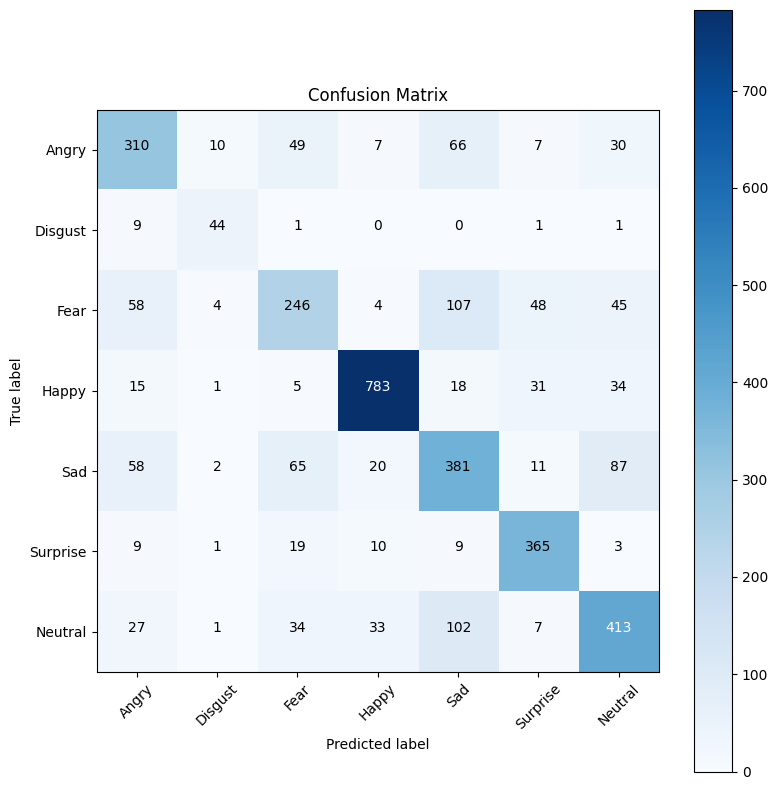

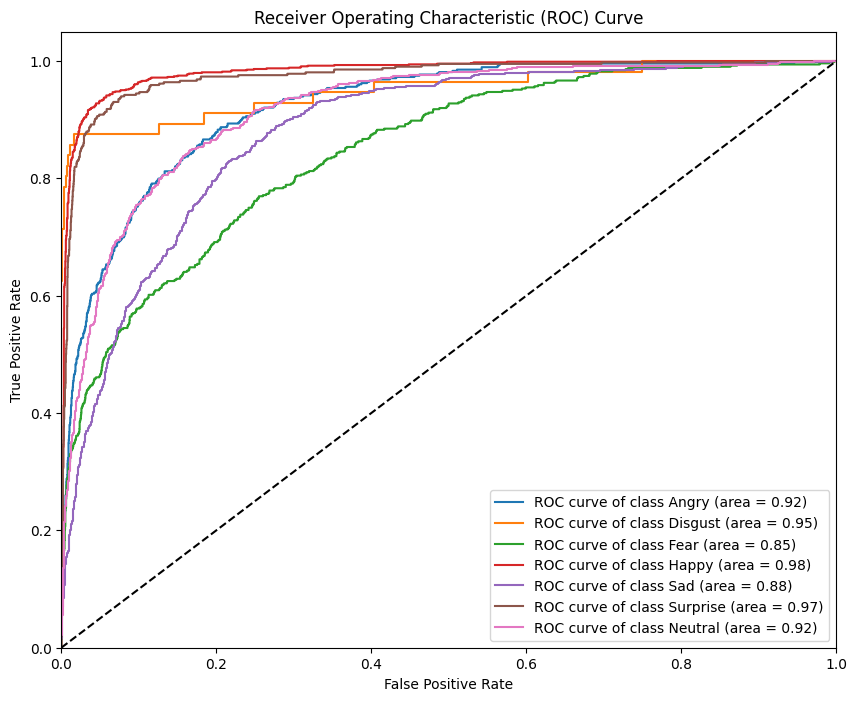

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


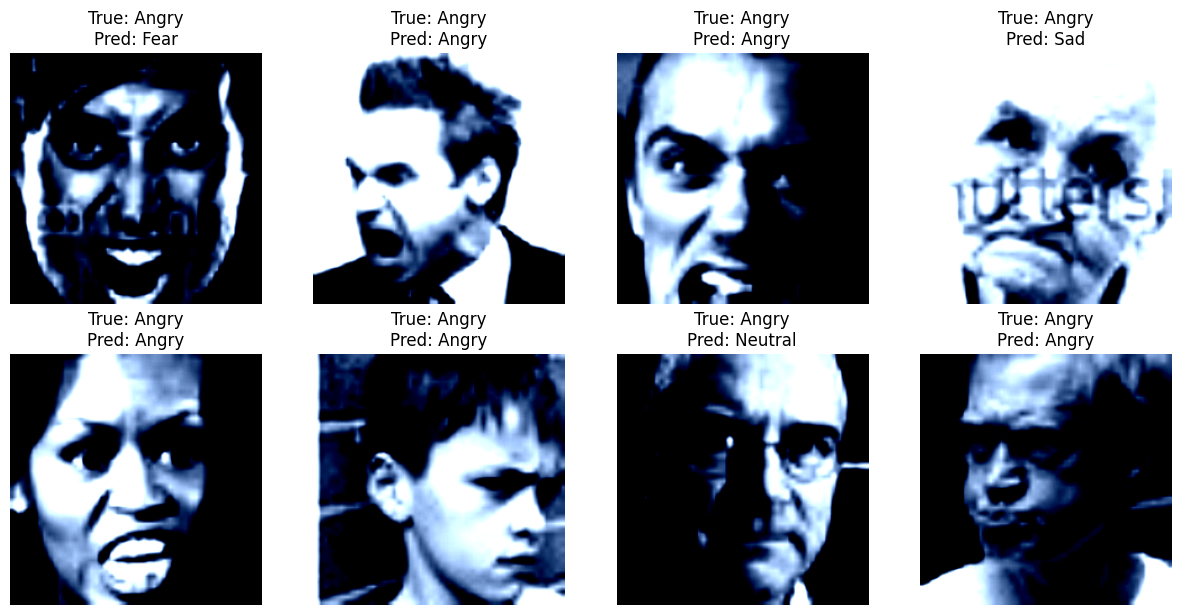

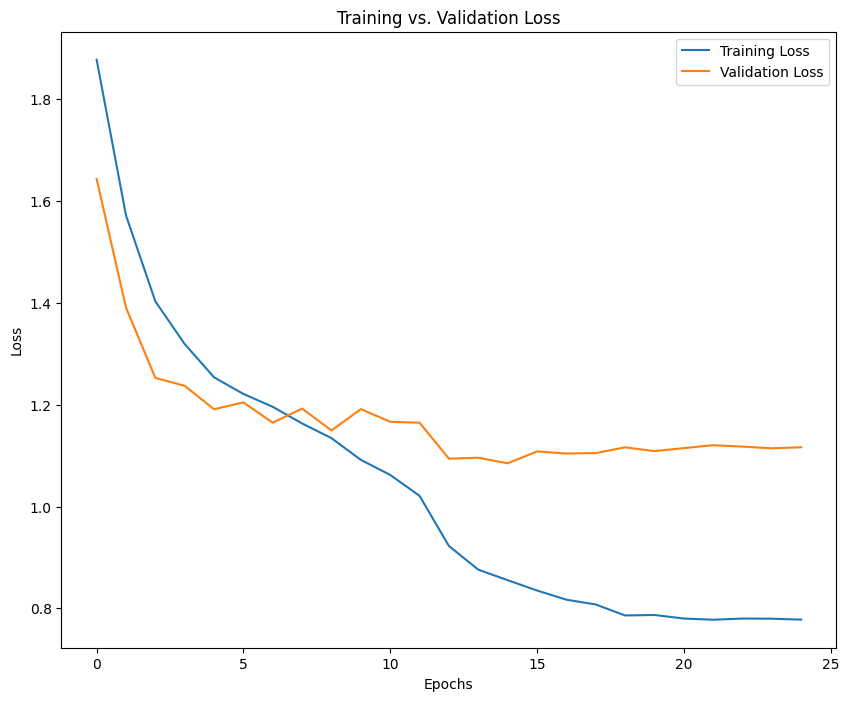

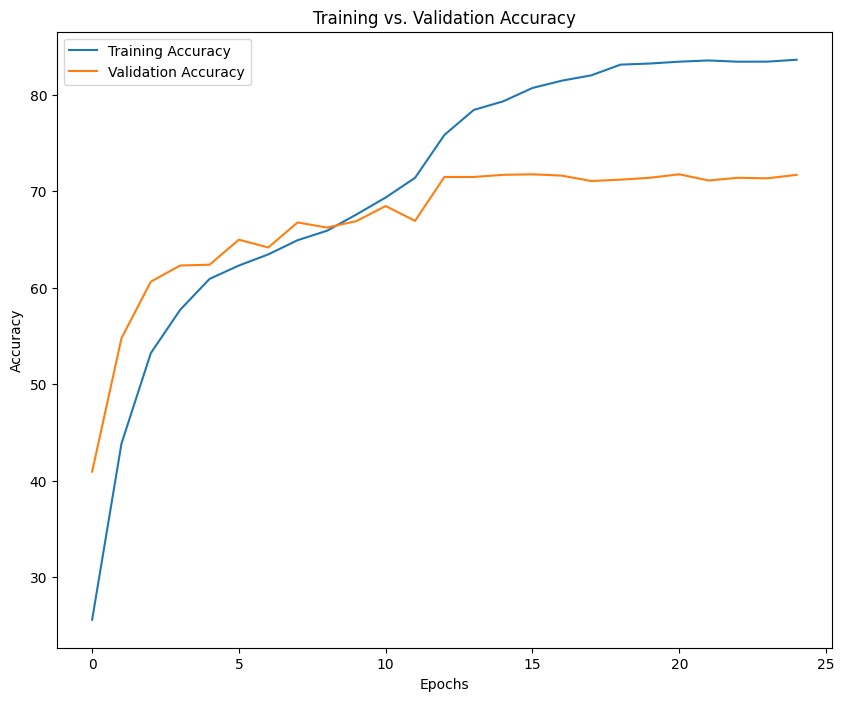

In [7]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import itertools
from PIL import Image
from collections import Counter
import torch.nn.functional as F
from torch.optim import lr_scheduler
from torchvision.transforms import functional as TF
from torchsummary import summary
from torchviz import make_dot


# Helper function to load images and labels
def load_data(data_path):
    images = []
    labels = []
    label_map = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'sad': 4, 'surprise': 5, 'neutral': 6}
    for label_name, label in label_map.items():
        folder_path = os.path.join(data_path, label_name)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            image = Image.open(file_path).convert('RGB')  # Read images as RGB
            images.append(image)
            labels.append(label)
    return images, labels

# Load FER2013 data
train_images, train_labels = load_data(train_data_path)
val_images, val_labels = load_data(val_data_path)
test_images, test_labels = load_data(test_data_path)

# Print class distribution before augmentation
train_labels_counter = Counter(train_labels)
val_labels_counter = Counter(val_labels)
test_labels_counter = Counter(test_labels)
print(f"Class distribution in training set before augmentation: {train_labels_counter}")
print(f"Class distribution in validation set before augmentation: {val_labels_counter}")
print(f"Class distribution in test set before augmentation: {test_labels_counter}")

class FER2013Dataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# Custom transform to adjust brightness
class AdjustBrightness(object):
    def __init__(self, brightness=0.2):
        self.brightness = brightness

    def __call__(self, img):
        return TF.adjust_brightness(img, 1 + (self.brightness * (torch.rand(1).item() * 2 - 1)))

# Custom transform to adjust contrast
class AdjustContrast(object):
    def __init__(self, contrast=0.2):
        self.contrast = contrast

    def __call__(self, img):
        return TF.adjust_contrast(img, 1 + (self.contrast * (torch.rand(1).item() * 2 - 1)))

# Data transformations with data augmentation
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(224, padding=4),
    AdjustBrightness(brightness=0.2),
    AdjustContrast(contrast=0.2),
    transforms.ToTensor(),  # Ensure ToTensor is applied before Normalize and RandomErasing
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3)),
])

# Transformations for validation and test data
transform_eval = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),  # Ensure ToTensor is applied before Normalize
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_dataset = FER2013Dataset(train_images, train_labels, transform=transform_train)
val_dataset = FER2013Dataset(val_images, val_labels, transform=transform_eval)
test_dataset = FER2013Dataset(test_images, test_labels, transform=transform_eval)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.fc = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_channels // reduction, in_channels, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=kernel_size // 2, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv1(x)
        return self.sigmoid(x)

class CBAM(nn.Module):
    def __init__(self, in_channels, reduction=16, kernel_size=7):
        super(CBAM, self).__init__()
        self.channel_attention = ChannelAttention(in_channels, reduction)
        self.spatial_attention = SpatialAttention(kernel_size)

    def forward(self, x):
        out = x * self.channel_attention(x)
        out = out * self.spatial_attention(out)
        return out

class AttentionResNet(nn.Module):
    def __init__(self, num_classes=7, dropout_prob=0.3):
        super(AttentionResNet, self).__init__()
        self.resnet = models.resnet50(pretrained=True)
        self.resnet.fc = nn.Identity()  # Remove the fully connected layer
        self.cbam0 = CBAM(64)  # Adding CBAM after the first conv layer
        self.cbam1 = CBAM(256)
        self.cbam2 = CBAM(512)
        self.cbam3 = CBAM(1024)
        self.cbam4 = CBAM(2048)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc1 = nn.Linear(2048, 512)  # Additional fully connected layer
        self.bn1 = nn.BatchNorm1d(512)  # BatchNorm applied to the new FC layer
        self.fc2 = nn.Linear(512, num_classes)  # Final output layer

    def forward(self, x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.cbam0(x)  # Apply CBAM after the first conv layer
        x = self.resnet.maxpool(x)  # Max pooling layer

        # First block with CBAM
        x1 = self.resnet.layer1(x)
        x1 = self.cbam1(x1)

        # Second block with CBAM
        x2 = self.resnet.layer2(x1)
        x2 = self.cbam2(x2)

        # Third block with CBAM
        x3 = self.resnet.layer3(x2)
        x3 = self.cbam3(x3)

        # Fourth block with CBAM
        x4 = self.resnet.layer4(x3)
        x4 = self.cbam4(x4)

        x = self.resnet.avgpool(x4)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)  # Activation function for the new FC layer
        x = self.dropout(x)  # Apply dropout again to the new FC layer
        x = self.fc2(x)

        return x

class LabelSmoothingCrossEntropy(nn.Module):
    def __init__(self, smoothing=0.1, class_weights=None):
        super(LabelSmoothingCrossEntropy, self).__init__()
        self.smoothing = smoothing
        self.confidence = 1.0 - smoothing
        if class_weights is not None:
            self.class_weights = torch.tensor(class_weights, dtype=torch.float32).cuda()
        else:
            self.class_weights = None

    def forward(self, x, target):
        logprobs = F.log_softmax(x, dim=-1)

        if self.class_weights is not None:
            logprobs = logprobs * self.class_weights[target].view(-1, 1)

        nll_loss = -logprobs.gather(dim=-1, index=target.unsqueeze(1))
        nll_loss = nll_loss.squeeze(1)
        smooth_loss = -logprobs.mean(dim=-1)
        loss = self.confidence * nll_loss + self.smoothing * smooth_loss
        return loss.mean()

# Function to count the number of parameters in the model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Hyperparameters
num_epochs = 100
learning_rate = 0.0001
weight_decay = 0.0001
early_stopping_patience = 10
plateau_patience = 2
warmup_epochs = 7
step_lr_size = 50

class_weights = [
    1.02660468,
    9.40661861,
    1.00104606,
    0.56843877,
    0.84912748,
    1.29337298,
    0.82603942,
]
class_weights = torch.FloatTensor(np.array(class_weights))

# Model, Loss, Optimizer, Scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AttentionResNet(num_classes=7).to(device)

# Print the total number of parameters
num_params = count_parameters(model)
print(f"Total number of parameters in the model: {num_params}")

# Print the model summary
summary(model, input_size=(3, 224, 224))

# Generate a sample input for visualization
model.eval()  # Set the model to evaluation mode
sample_input = torch.randn(4, 3, 224, 224).to(device)  # Use a batch size of 4
sample_output = model(sample_input)

# Create a visualization of the model
dot = make_dot(sample_output, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render('model_architecture')

criterion = LabelSmoothingCrossEntropy(smoothing=0.1, class_weights=class_weights).to(device)
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)



# Warm-Up Scheduler
warmup_scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda epoch: (epoch + 1) / (warmup_epochs + 1) if epoch < warmup_epochs else 1)

# Learning Rate Scheduler
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=plateau_patience, min_lr=1e-7, verbose=True)


# Custom function to monitor and enforce scheduler update
def enforce_scheduler_step(scheduler, val_loss):
    prev_lr = optimizer.param_groups[0]['lr']
    scheduler.step(val_loss)
    new_lr = optimizer.param_groups[0]['lr']
    return new_lr < prev_lr



train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping variables
best_val_loss = float('inf')
early_stop_counter = 0

# Training Loop with gradient clipping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Clip gradients with max_norm

        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%')

    # Validation Loop
    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    # Warm-Up or Step the scheduler with the validation loss
    if epoch < warmup_epochs:
        warmup_scheduler.step()
        print(f'Warmup Scheduler Step at Epoch {epoch+1}')
    else:
        if enforce_scheduler_step(scheduler, val_loss):
            print(f'Learning rate reduced at Epoch {epoch+1} due to plateau --------------->>>>---')

    # Print the current learning rate
    current_lr = optimizer.param_groups[0]['lr']
    print(f'---- Current Learning Rate soon after the scheduler step ----- : {current_lr:.7f}')

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
    else:
        early_stop_counter += 1
        print(f"Validation loss did not improve at epoch {epoch+1}. Early stopping counter: {early_stop_counter}/{early_stopping_patience}")
        if early_stop_counter >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch+1} with best validation loss: {best_val_loss:.4f}")
            break

print('Hyper params : learning_rate', learning_rate)
print('Hyper params : weight_decay', weight_decay)
print('Hyper params : early_stopping_patience', early_stopping_patience)
print('Hyper params : num_epochs', num_epochs)
print('Hyper params : LR patience', plateau_patience)
print('Hyper params : warmup_epochs', warmup_epochs)

print('------------------------------------')
print('------------------------------------')
print('Training Finished')

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Evaluate on the test set
y_test = np.array(test_labels)
model.eval()
y_pred = []
y_pred_prob = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_pred_prob.extend(F.softmax(outputs, dim=1).cpu().numpy())  # Apply softmax to get probabilities

test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}".format(test_accuracy))

# Calculate and print additional classification metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')
mcc = matthews_corrcoef(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")
print(f"Cohen's Kappa: {kappa:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
plot_confusion_matrix(conf_matrix, classes=emotion_classes, title='Confusion Matrix')

# Plot ROC AUC curve
def plot_roc_auc(y_true, y_pred_prob, classes):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, np.array(y_pred_prob)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC AUC curve
plot_roc_auc(y_test, y_pred_prob, emotion_classes)

# Visualize some predictions
def visualize_predictions(model, data_loader, classes, device):
    model.eval()
    images, labels = next(iter(data_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(15, 15))
    for i in range(8):
        plt.subplot(4, 4, i+1)
        plt.axis('off')
        plt.imshow(images[i].cpu().numpy().transpose((1, 2, 0)))
        plt.title(f'True: {classes[labels[i]]}\nPred: {classes[preds[i]]}')
    plt.show()

# Visualize predictions
visualize_predictions(model, test_loader, emotion_classes, device='cuda')

# Plot training vs. test loss curve
def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(10, 8))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    plt.show()

# Plot train vs val accuracy curve
def plot_accuracy_curve(train_accuracies, val_accuracies):
    plt.figure(figsize=(10, 8))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs. Validation Accuracy')
    plt.legend()
    plt.show()

# Plot the loss curves
plot_loss_curve(train_losses, val_losses)

# Plot the accuracy curves
plot_accuracy_curve(train_accuracies, val_accuracies)

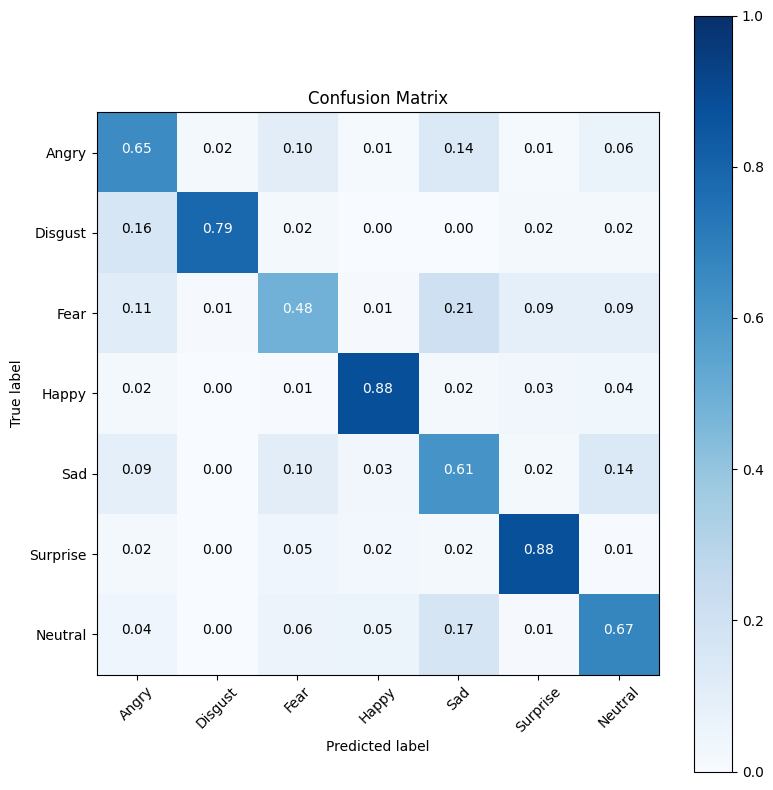

In [8]:
# Function to plot confusion matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_norm_matrix(cm, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 8))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
plot_confusion_norm_matrix(conf_matrix, classes=emotion_classes, title='Confusion Matrix')



In [29]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hooks = []

        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output
            #print("Forward Hook Activated")

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0]
            #print("Backward Hook Activated")

        self.hooks.append(self.target_layer.register_forward_hook(forward_hook))
        self.hooks.append(self.target_layer.register_backward_hook(backward_hook))

    def generate_cam(self, input_image, target_class=None):
        self.model.zero_grad()
        output = self.model(input_image)

        if target_class is None:
            target_class = output.argmax(dim=1)

        loss = output[0, target_class]
        loss.backward(retain_graph=True)

        if self.gradients is None or self.activations is None:
            raise ValueError("Gradients or activations are not captured correctly.")

        gradients = self.gradients.cpu().data.numpy()[0]
        activations = self.activations.cpu().data.numpy()[0]
        weights = np.mean(gradients, axis=(1, 2))

        cam = np.zeros(activations.shape[1:], dtype=np.float32)
        for i, w in enumerate(weights):
            cam += w * activations[i, :, :]

        cam = np.maximum(cam, 0)
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)
        cam = np.uint8(cam * 255)
        cam = cv2.resize(cam, (input_image.shape[2], input_image.shape[3]))

        return cam

    def __del__(self):
        for hook in self.hooks:
            hook.remove()


Forward Hook Activated
Forward Hook Activated
Forward Hook Activated
Forward Hook Activated
Backward Hook Activated
Backward Hook Activated
Backward Hook Activated
Backward Hook Activated


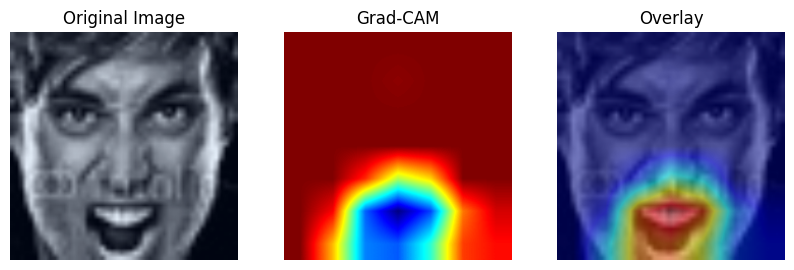

Forward Hook Activated
Forward Hook Activated
Forward Hook Activated
Forward Hook Activated
Backward Hook Activated
Backward Hook Activated
Backward Hook Activated
Backward Hook Activated


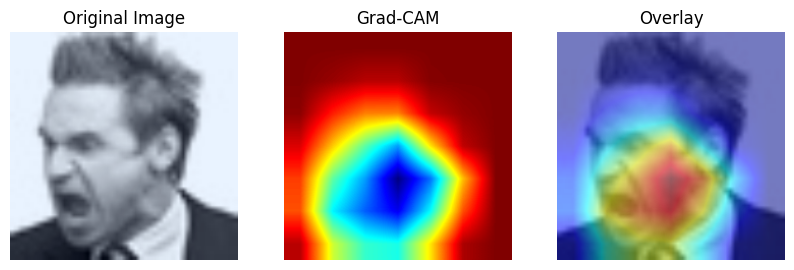

Forward Hook Activated
Forward Hook Activated
Forward Hook Activated
Forward Hook Activated
Backward Hook Activated
Backward Hook Activated
Backward Hook Activated
Backward Hook Activated


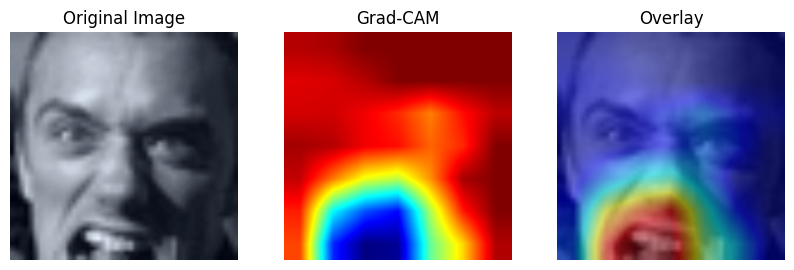

Forward Hook Activated
Forward Hook Activated
Forward Hook Activated
Forward Hook Activated
Backward Hook Activated
Backward Hook Activated
Backward Hook Activated
Backward Hook Activated


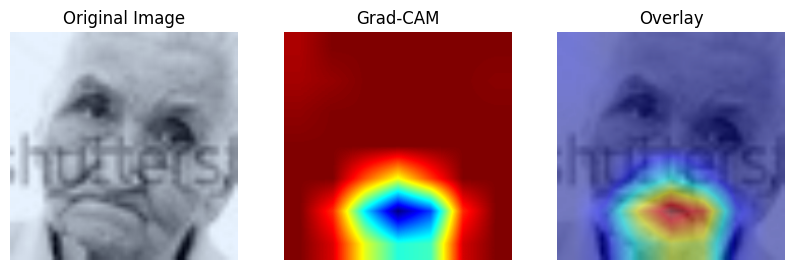

In [30]:
import cv2
import matplotlib.pyplot as plt

def visualize_grad_cam(grad_cam, data_loader, classes, device):
    model.eval()
    images, labels = next(iter(data_loader))
    images, labels = images.to(device), labels.to(device)
    
    for i in range(4):  # Visualize the first 4 images in the batch
        input_image = images[i].unsqueeze(0)
        target_class = labels[i].item()
        cam = grad_cam.generate_cam(input_image, target_class)
        
        # Debug: Print shapes of gradients and activations
        #print(f"Gradients shape: {grad_cam.gradients.shape}")
        #print(f"Activations shape: {grad_cam.activations.shape}")
        
        # Plot the original image, CAM, and overlay
        img = input_image.cpu().squeeze().permute(1, 2, 0).numpy()
        img = (img - img.min()) / (img.max() - img.min())  # Normalize image
        img = np.uint8(img * 255)  # Convert to uint8
        cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)
        overlay = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), 0.5, cam, 0.5, 0)
        
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(img)
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.title('Grad-CAM')
        plt.imshow(cam)
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.title('Overlay')
        plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

# Initialize Grad-CAM
target_layer = model.resnet.layer4[2].conv3  # Update based on your model architecture
grad_cam = GradCAM(model, target_layer)

# Visualize Grad-CAM results
visualize_grad_cam(grad_cam, test_loader, emotion_classes, device='cuda')


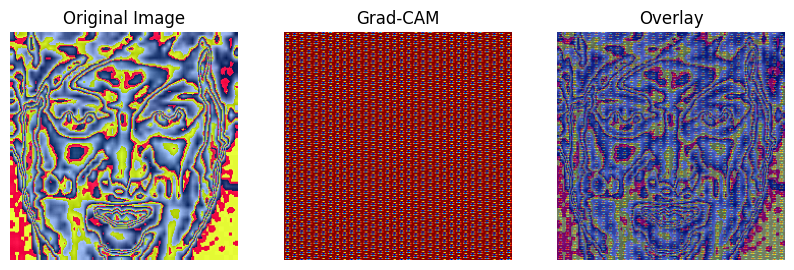

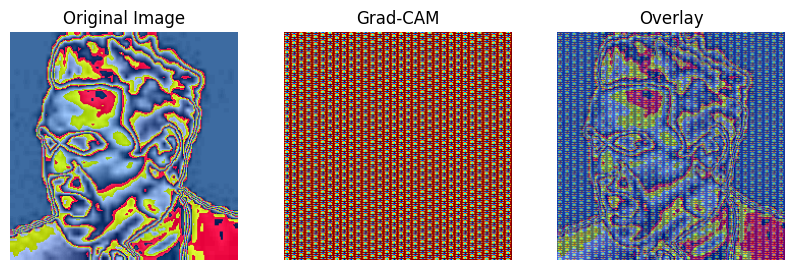

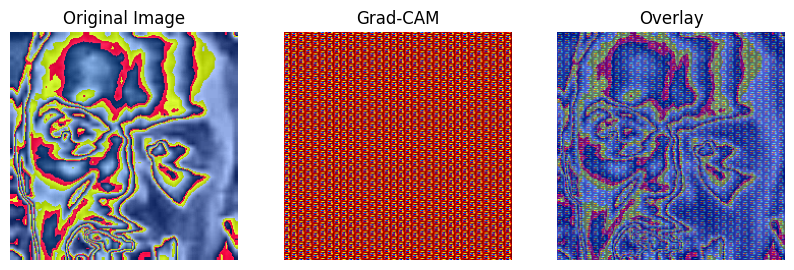

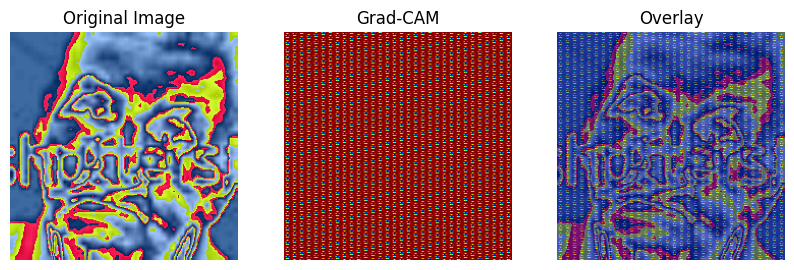

In [12]:
import cv2

# Initialize Grad-CAM
target_layer = model.resnet.layer4[2].conv3  # Update based on your model architecture
grad_cam = GradCAM(model, target_layer)

# Visualize Grad-CAM results
visualize_grad_cam(grad_cam, test_loader, emotion_classes, device='cuda')

-----------

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


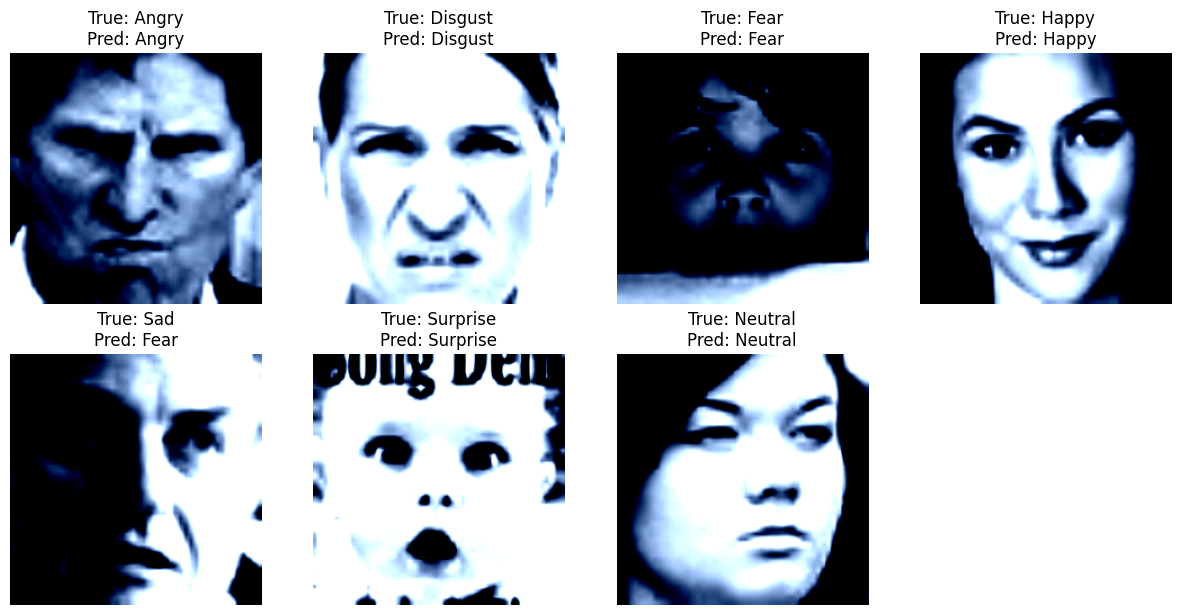

In [16]:
import torch
import random
import matplotlib.pyplot as plt

# Visualize some predictions
def visualize_imageperclass_predictions(model, data_loader, classes, device):
    model.eval()

    # Dictionary to store samples for each class
    samples_per_class = {class_idx: [] for class_idx in range(len(classes))}

    # Iterate through the data loader and collect samples
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            for img, label, pred in zip(images, labels, preds):
                samples_per_class[label.item()].append((img, label, pred))

    # Randomly select one image per class
    selected_images = []
    for class_idx in samples_per_class:
        if samples_per_class[class_idx]:
            selected_images.append(random.choice(samples_per_class[class_idx]))

    # Plot the selected images
    plt.figure(figsize=(15, 15))
    for i, (img, label, pred) in enumerate(selected_images):
        plt.subplot(4, 4, i+1)
        plt.axis('off')
        plt.imshow(img.cpu().numpy().transpose((1, 2, 0)))
        plt.title(f'True: {classes[label.item()]}\nPred: {classes[pred.item()]}')
    plt.show()

# Visualize predictions
visualize_imageperclass_predictions(model, test_loader, emotion_classes, device='cuda')


In [ ]:
# Visualize some predictions
def visualize_predictions(model, data_loader, classes, device):
    model.eval()
    images, labels = next(iter(data_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    plt.figure(figsize=(15, 15))
    for i in range(min(16, len(images))):  # Ensure that we don't try to plot more images than available
        plt.subplot(4, 4, i+1)
        plt.axis('off')
        image = images[i].cpu().numpy().transpose((1, 2, 0))
        image = np.clip(image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)
        plt.imshow(image)
        plt.title(f'True: {classes[labels[i]]}\nPred: {classes[preds[i]]}')
    plt.show()

# Visualize predictions on the test set
visualize_predictions(model, test_loader, emotion_classes, device='cuda')
